# Correlation Analysis

### Setup

In [5]:
import pandas
import matplotlib.pyplot as plt
import requests
import seaborn as sns

from polygon import RESTClient

# Define Polygon.io API Key
api_key = "B3Yx9CkMEHoLRKJwkk1x8kGVzktAFndC"

# Define Stock Basket - Limited to 5 Stocks due to free api subscription
symbols = ['AAPL', 'GS', 'IBM', 'JNJ', 'GOOG']

#Define Analysis Window
start_date = "2019-04-01"
end_date = "2024-04-01"

### Define helper functions
#### Get historical closing price to extract returns data

In [6]:
def fetch_stock_data(tickers, start, end):
    stocks = []

    try:
        for symbol in tickers:
            client = RESTClient(api_key=api_key)
            aggs = client.get_aggs(symbol,1,"day", start, end)
            prices = pandas.DataFrame(aggs, columns=["timestamp", "close"])

            prices = prices[prices["timestamp"] > 0]

            prices["timestamp"] = pandas.to_datetime(prices["timestamp"], unit="ms")
            prices.set_index("timestamp", inplace=True)

            prices.rename(columns={"close": symbol}, inplace=True)
            stocks.append(prices)
    except:
        pass

    merged_stocks = pandas.concat(stocks, axis=1)
    return merged_stocks


def fetch_polygon_data(ticker, start_date, end_date):
    url = f"https://api.polygon.io/v2/aggs/ticker/{ticker}/range/1/day/{start_date}/{end_date}"
    params = {"apiKey": api_key}
    response = requests.get(url, params=params)
    if response.status_code == 200:
        data = response.json()
        return data
    else:
        print("Failed to fetch data:", response.status_code)
        return None


def calculate_daily_returns(stock_data):
    daily_returns = stock_data.pct_change().dropna()
    return daily_returns


def compute_correlation_matrix(daily_returns):
    correlation_matrix = daily_returns.corr()
    return correlation_matrix


def plot_correlation_heatmap(correlation_matrix):
    plt.figure(figsize=(8, 8))

    ax = sns.heatmap(
        correlation_matrix,
        annot=True,
        cmap="coolwarm",
        vmin=-1,
        vmax=1,
        square=True,
        linewidths=0.5,
        cbar_kws={"shrink": 0.8},
    )
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position("top")

    plt.title("Correlation Matrix Heatmap", y=1.08)
    plt.show()

#### Fetch stock data, compute returns, compute correlation matrix

Correlation Matrix:
          AAPL        GS       IBM       JNJ      GOOG
AAPL  1.000000  0.429201  0.378753  0.273689  0.667281
GS    0.429201  1.000000  0.388144  0.289489  0.373591
IBM   0.378753  0.388144  1.000000  0.331749  0.276346
JNJ   0.273689  0.289489  0.331749  1.000000  0.178386
GOOG  0.667281  0.373591  0.276346  0.178386  1.000000


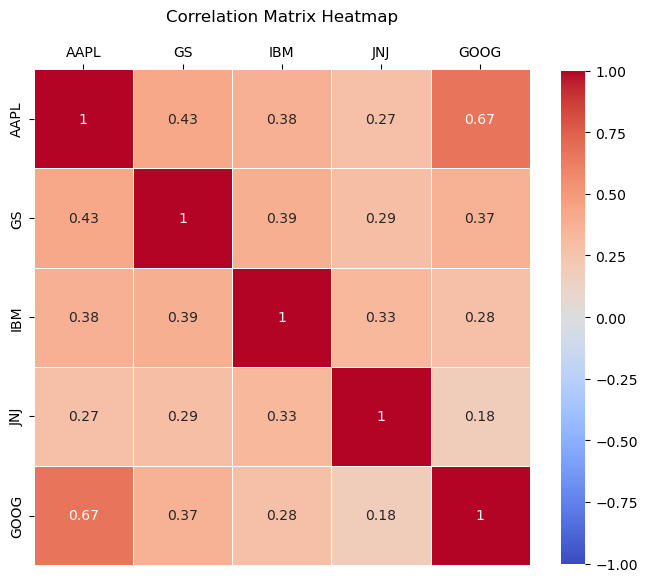

In [7]:
stock_data = fetch_stock_data(symbols, start_date, end_date)
daily_returns = calculate_daily_returns(stock_data)
correlation_matrix = compute_correlation_matrix(daily_returns)

print("Correlation Matrix:")
print(correlation_matrix)

plot_correlation_heatmap(correlation_matrix)
